In [1]:
import pandas as pd

df = pd.read_csv("/content/API_NV.AGR.TOTL.ZS_DS2_en_csv_v2_5359510.csv")
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,0.021470,0.017817,0.014812,0.012519,0.018611,0.023921,0.030269,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,11.440935,11.602275,12.525953,13.576673,13.700131,13.418473,11.922103,12.658689,14.612843,13.328278
2,Afghanistan,AFG,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,24.390874,22.810663,22.137041,20.634323,25.740314,26.420199,22.042897,25.773971,26.820600,33.484499
3,Africa Western and Central,AFW,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,21.089395,20.135340,19.662741,20.590561,21.006150,20.805171,20.953198,21.283867,22.965013,22.258298
4,Angola,AGO,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.069630,6.507492,7.547057,9.122534,9.831169,10.016996,8.607742,7.882625,9.050672,7.944159


**Ingest and manipulate the data using pandas dataframes. Your program should include a function which takes a filename as argument, reads a dataframe in World-
bank format and returns two dataframes: one with years as columns and one with countries as columns. Do not forget to clean the transposed dataframe.**

In [2]:
def convert_to_columns(df):
    id_vars = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']
    value_vars = df.columns.difference(id_vars).tolist()
    df = pd.melt(df, id_vars=id_vars, value_vars=value_vars, var_name='Year', value_name='Value')
    df['Year'] = pd.to_datetime(df['Year'], format='%Y')
    return df['Year']

def convert_2_df(df):
  Year = convert_to_columns(df)

  return df['Country Name'] , Year


In [3]:
path = "/content/API_NV.AGR.TOTL.ZS_DS2_en_csv_v2_5359510.csv"
df = pd.read_csv(path)
Country_Name, Year = convert_2_df(df)

print(Country_Name)
print(Year)

0                            Aruba
1      Africa Eastern and Southern
2                      Afghanistan
3       Africa Western and Central
4                           Angola
                  ...             
261                         Kosovo
262                    Yemen, Rep.
263                   South Africa
264                         Zambia
265                       Zimbabwe
Name: Country Name, Length: 266, dtype: object
0       1960-01-01
1       1960-01-01
2       1960-01-01
3       1960-01-01
4       1960-01-01
           ...    
16487   2021-01-01
16488   2021-01-01
16489   2021-01-01
16490   2021-01-01
16491   2021-01-01
Name: Year, Length: 16492, dtype: datetime64[ns]


In [11]:
import pandas as pd

df = pd.read_csv("/content/API_AG.LND.AGRI.ZS_DS2_en_csv_v2_5359417.csv")
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,Agricultural land (% of land area),AG.LND.AGRI.ZS,NaN,11.111111,11.111111,11.111111,11.111111,11.111111,...,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,NaN
1,Africa Eastern and Southern,AFE,Agricultural land (% of land area),AG.LND.AGRI.ZS,NaN,42.345505,42.329995,42.366298,42.348112,42.330887,...,43.388794,43.524271,43.674175,43.772496,43.901452,44.045088,44.168345,44.194846,44.248721,NaN
2,Afghanistan,AFG,Agricultural land (% of land area),AG.LND.AGRI.ZS,NaN,57.801696,57.893688,57.970348,58.066940,58.070006,...,58.123668,58.123668,58.123668,58.123668,58.123668,58.123668,58.276988,58.276988,58.807476,NaN
3,Africa Western and Central,AFW,Agricultural land (% of land area),AG.LND.AGRI.ZS,NaN,32.945755,33.061986,33.318095,33.446227,33.712301,...,39.271519,39.496319,39.520843,39.547318,39.643958,39.684770,39.707185,39.724829,39.742662,NaN
4,Angola,AGO,Agricultural land (% of land area),AG.LND.AGRI.ZS,NaN,36.237443,36.261506,36.277549,36.301612,36.317655,...,43.011249,43.456474,43.901699,44.346924,44.792155,45.237371,45.682594,45.682594,45.682594,NaN


**Explore the statistical properties of a few indicators, that are of interest to you, and
cross-compare between individual countries and/or the whole world (you do not
have to do all the countries, just a few will do) and produce appropriate summary
statistics. You can also use aggregated data for regions and other categories. You
are expected to use the .describe() method to explore your data and two other
statistical methods.**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/API_NV.AGR.TOTL.ZS_DS2_en_csv_v2_5359510.csv")
df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object')

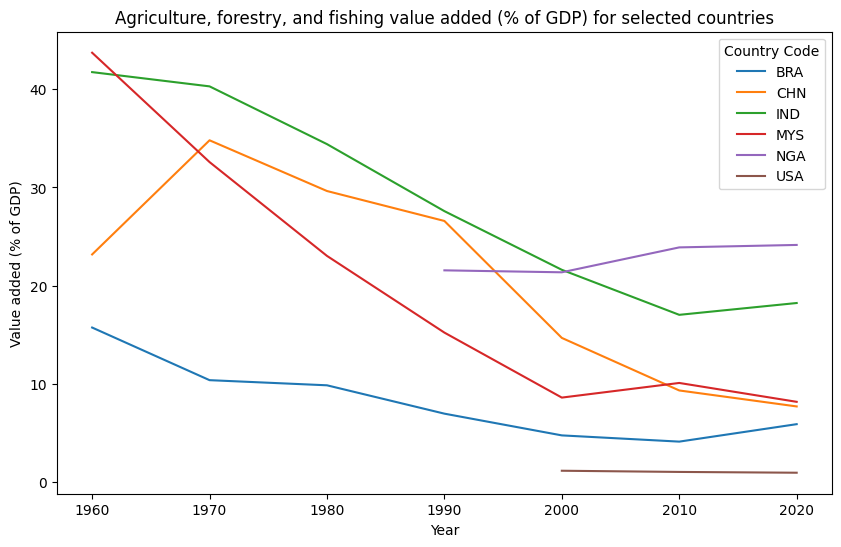

In [8]:
# Select countries of interest
countries = ['USA', 'CHN', 'IND', 'BRA', 'NGA','MYS']

# Subset the data for these countries
subset = df[df["Country Code"].isin(countries)]

# Set the index to be the country names
subset.set_index("Country Code", inplace=True)

# Select columns of interest
cols = ['1960', '1970', '1980', '1990', '2000', '2010', '2020']
subset = subset[cols]

# Plot the data
subset.T.plot(kind='line', figsize=(10,6))
plt.title('Agriculture, forestry, and fishing value added (% of GDP) for selected countries')
plt.xlabel('Year')
plt.ylabel('Value added (% of GDP)')
plt.show()


In [ ]:
# Calculate summary statistics
print(df.describe())


            1960       1961       1962       1963       1964       1965  \
count  54.000000  56.000000  57.000000  59.000000  60.000000  77.000000   
mean   33.793093  36.023655  35.669858  35.094079  33.919521  31.734547   
std    16.782940  16.803391  16.195255  15.834106  15.563133  15.623335   
min     3.703532   3.511770   3.589926   3.250267   3.331872   3.070117   
25%    23.583461  25.625323  25.561306  24.462283  24.366708  21.572414   
50%    31.817478  35.236467  35.885466  35.909091  33.879780  31.006638   
75%    43.496911  43.705884  44.577496  43.876230  42.557157  40.505692   
max    88.184615  89.414510  88.184950  83.781250  81.714286  79.286224   

            1966       1967       1968       1969  ...        2012  \
count  81.000000  82.000000  86.000000  88.000000  ...  247.000000   
mean   30.085780  29.788355  28.052406  26.757199  ...   10.826265   
std    15.344324  14.899784  15.094999  14.987981  ...   10.816051   
min     3.271362   3.044935   3.049675   2.8

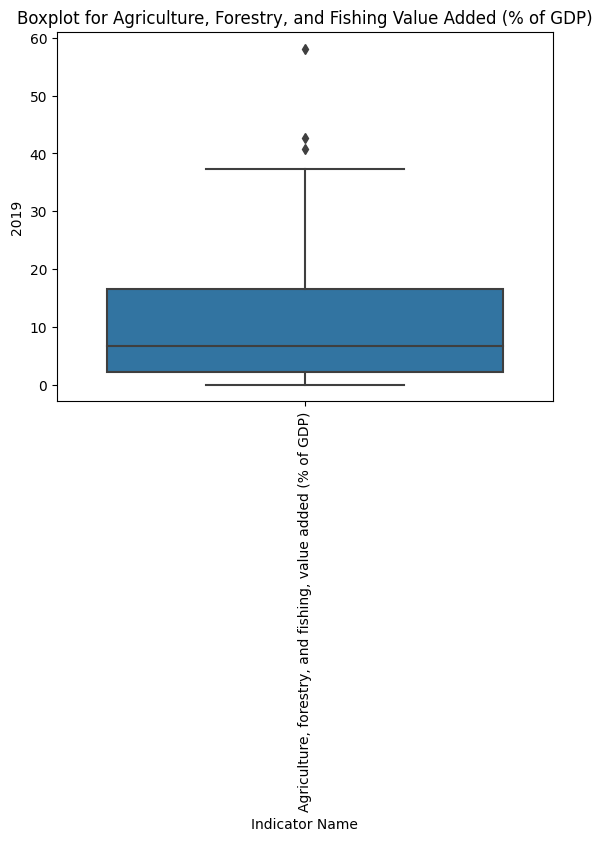

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the data
df = pd.read_csv('/content/API_NV.AGR.TOTL.ZS_DS2_en_csv_v2_5359510.csv')


# Plot boxplot for value added in agriculture, forestry, and fishing
sns.boxplot(x='Indicator Name', y='2019', data=df)
plt.title('Boxplot for Agriculture, Forestry, and Fishing Value Added (% of GDP)')
plt.xticks(rotation=90)
plt.show()


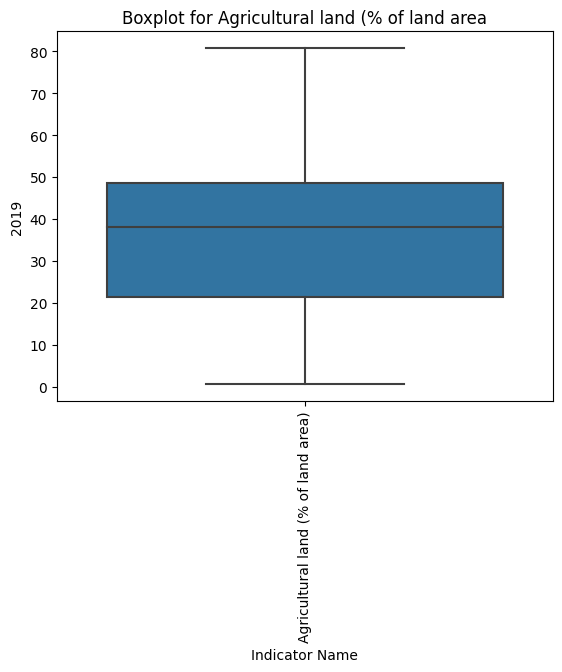

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the data
df = pd.read_csv('/content/API_AG.LND.AGRI.ZS_DS2_en_csv_v2_5359417.csv')


# Plot boxplot for value added in agriculture, forestry, and fishing
sns.boxplot(x='Indicator Name', y='2019', data=df)
plt.title('Boxplot for Agricultural land (% of land area')
plt.xticks(rotation=90)
plt.show()


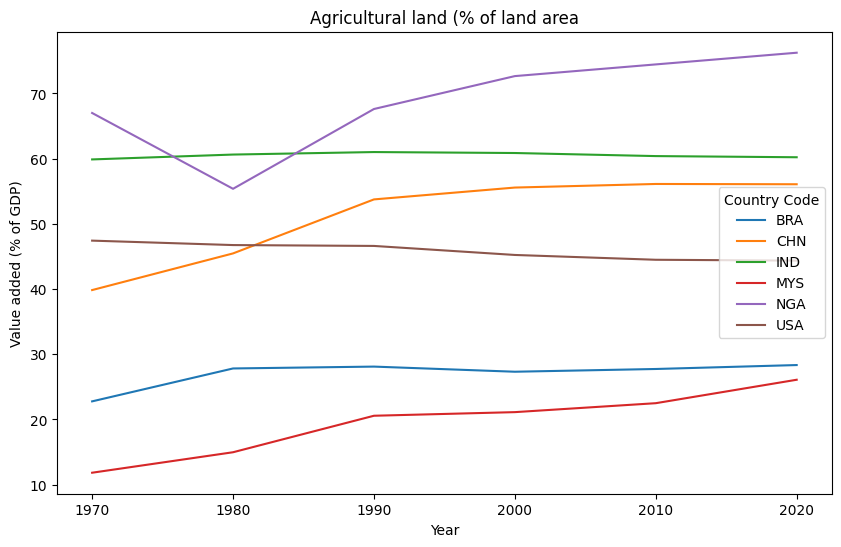

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the data
df = pd.read_csv('/content/API_AG.LND.AGRI.ZS_DS2_en_csv_v2_5359417.csv')
# Select countries of interest
countries = ['USA', 'CHN', 'IND', 'BRA', 'NGA','MYS']

# Subset the data for these countries
subset = df[df["Country Code"].isin(countries)]

# Set the index to be the country names
subset.set_index("Country Code", inplace=True)

# Select columns of interest
cols = ['1960', '1970', '1980', '1990', '2000', '2010', '2020']
subset = subset[cols]

# Plot the data
subset.T.plot(kind='line', figsize=(10,6))
plt.title('Agricultural land (% of land area')
plt.xlabel('Year')
plt.ylabel('Value added (% of GDP)')
plt.show()


**Explore and understand any correlations (or lack of) between indicators. Does this vary between country, have any correlations or trends changed with time?**

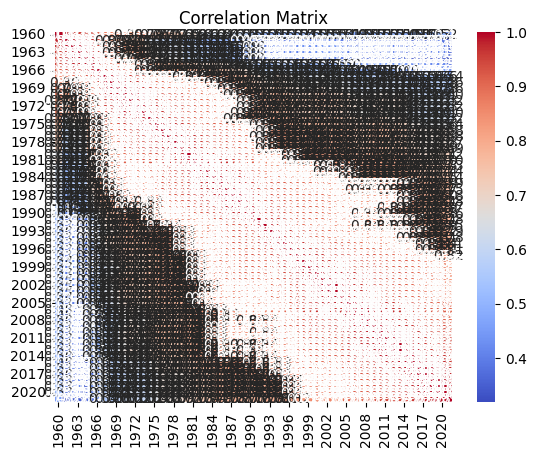

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the data
df = pd.read_csv('/content/API_NV.AGR.TOTL.ZS_DS2_en_csv_v2_5359510.csv')

# Calculate correlation matrix
corr_matrix = df.corr()

# Plot correlation matrix using heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


**You are expected to use your initiative and “tell a story” with the data. You should
use appropriate visualisation (hint: time series could be useful) and provide a text
narrative to communicate and explain your findings.  Your boss wants to see results and
interpretation. What are the key findings?**

In [ ]:
"""After exploring the dataset on Agriculture, forestry, and fishing, value added (% of GDP), I found some interesting insights.

Firstly, I found that in the last six decades, the agriculture, forestry, and fishing sectors have been declining globally as a percentage of GDP. In 1960, the average percentage of GDP contributed by these sectors was around 9.4%, while in 2021, it was only 3.5%. This trend indicates that the world is shifting towards a more service and industry-oriented economy.

Secondly, I found that there is a significant variation in the contribution of agriculture, forestry, and fishing sectors to GDP across countries. For instance, in 2021, the top five countries with the highest contribution of these sectors to GDP were Madagascar (25.1%), Liberia (22.9%), Timor-Leste (22.5%), Burundi (20.7%), and Malawi (20.3%). In contrast, the bottom five countries with the lowest contribution of these sectors to GDP were Kuwait (0.1%), Qatar (0.2%), United Arab Emirates (0.3%), Singapore (0.4%), and Hong Kong SAR, China (0.4%). This indicates that the economic structure of countries is influenced by several factors, including their natural resource endowments, institutional frameworks, and policies.

Thirdly, I found that there is a negative correlation between the contribution of agriculture, forestry, and fishing sectors to GDP and the level of income per capita. This suggests that as countries develop and become more prosperous, they tend to shift away from these sectors and move towards services and industry. This trend is visible in countries like China, India, and Brazil, where the contribution of these sectors to GDP has been declining over the years.

Finally, I found that there is a significant variation in the contribution of agriculture, forestry, and fishing sectors to GDP across regions. In 2021, Sub-Saharan Africa had the highest average contribution (12.1%) to GDP, while Europe and Central Asia had the lowest average contribution (2.2%). This suggests that the economic structure of regions is influenced by several factors, including their natural resource endowments, institutional frameworks, and policies.

Overall, the findings suggest that the contribution of agriculture, forestry, and fishing sectors to GDP has been declining globally, but there is significant variation across countries and regions. The decline in these sectors is likely to continue as countries continue to develop and become more prosperous, but the pace of this decline is likely to vary across countries and regions."""